In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combine = [df_train, df_test]

Dealing with categorical data and missing data

In [62]:
print(df_train.select_dtypes(include=['object']).columns.values)

['LotShape' 'LandContour' 'LotConfig' 'LandSlope' 'Condition1' 'Condition2'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'GarageType'
 'GarageFinish' 'PavedDrive' 'PoolQC' 'MiscFeature' 'SaleType']


In [63]:
df_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
LotShape        1460 non-null object
LandContour     1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
HouseStyle      1460 non-null object
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1452 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
PavedDrive      1460 non-null object
PoolQC          7 non-null object
MiscFeature     54 non-null object
SaleType        1460 non-null object
dtypes: object(21)
memory usage: 239.6+ KB


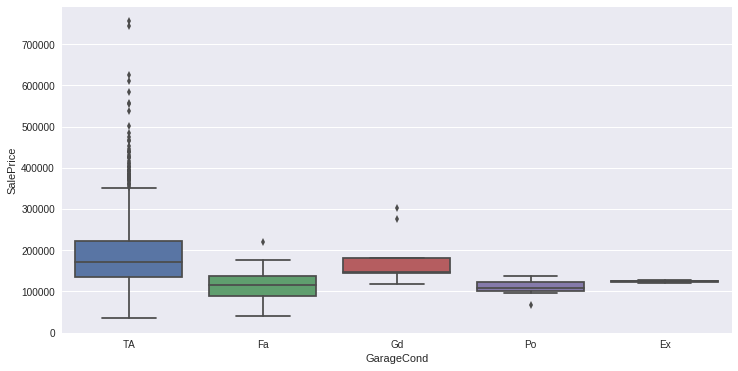

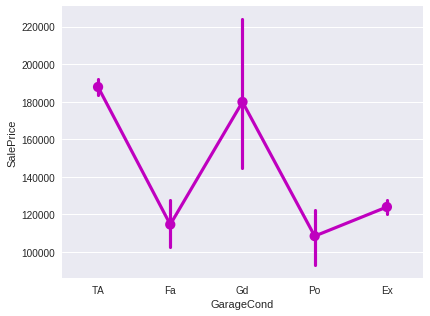

In [3]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'GarageCond', y = 'SalePrice',  data = df_train)
sns.factorplot('GarageCond', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [4]:
mapping_GarageCond = {"Ex":3, "Gd":4, "TA":5, "Fa":2, "Po":1}
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].map(mapping_GarageCond)
    dataset['GarageCond'] = dataset['GarageCond'].fillna(0) #No garage

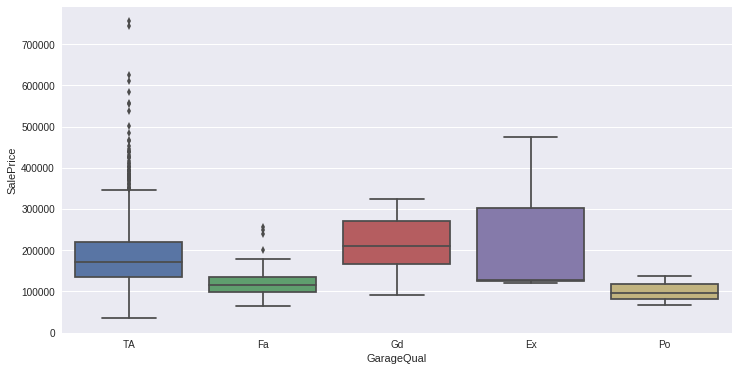

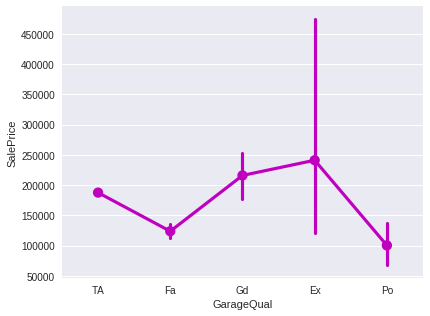

In [5]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'GarageQual', y = 'SalePrice',  data = df_train)
sns.factorplot('GarageQual', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [6]:
mapping_GarageQual = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].map(mapping_GarageQual)
    dataset['GarageQual'] = dataset['GarageQual'].fillna(0) #No garage

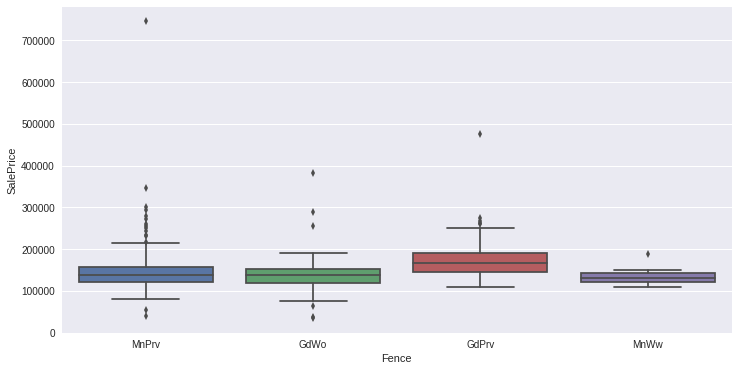

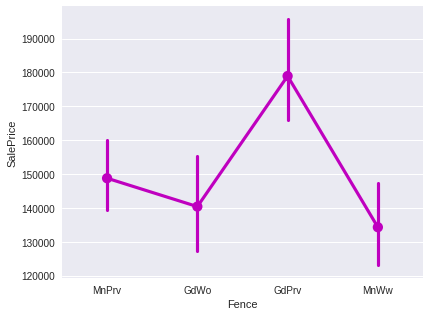

In [7]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Fence', y = 'SalePrice',  data = df_train)
sns.factorplot('Fence', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [8]:
mapping_Fence = {"GdPrv":4, "MnPrv":3, "GdWo":2, "MnWw":1}
for dataset in combine:
    dataset['Fence'] = dataset['Fence'].map(mapping_Fence)
    dataset['Fence'] = dataset['Fence'].fillna(0) #No fence

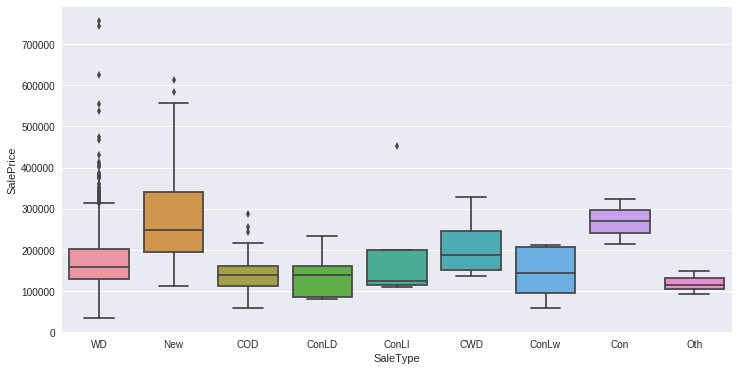

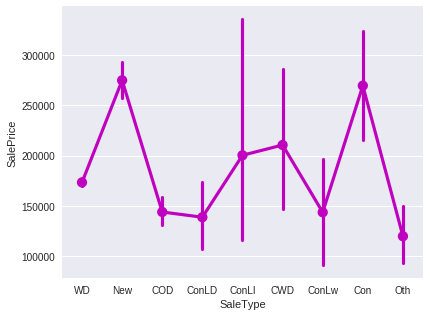

In [9]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice',  data = df_train)
sns.factorplot('SaleType', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

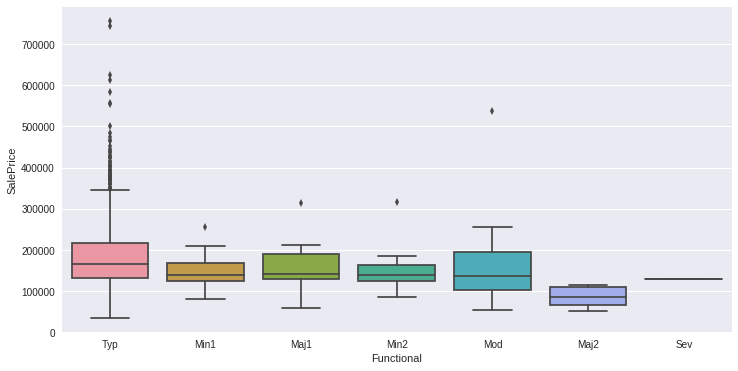

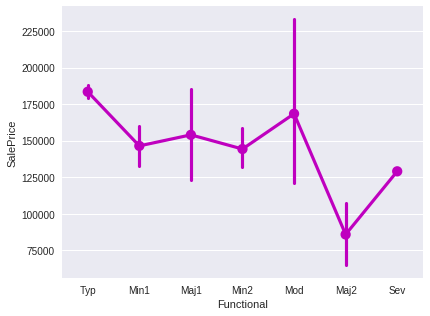

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Functional', y = 'SalePrice',  data = df_train)
sns.factorplot('Functional', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [13]:
for dataset in combine:
    dataset['Functional'] = dataset['Functional'].replace(['Typ'], 6)
    dataset['Functional'] = dataset['Functional'].replace(['Mod'], 5)
    dataset['Functional'] = dataset['Functional'].replace(['Maj1'], 4)
    dataset['Functional'] = dataset['Functional'].replace(['Min1','Min2'], 3)
    dataset['Functional'] = dataset['Functional'].replace(['Sev'], 2)
    dataset['Functional'] = dataset['Functional'].replace(['Maj2'], 1)
    dataset['Functional'] = dataset['Functional'].fillna(0)

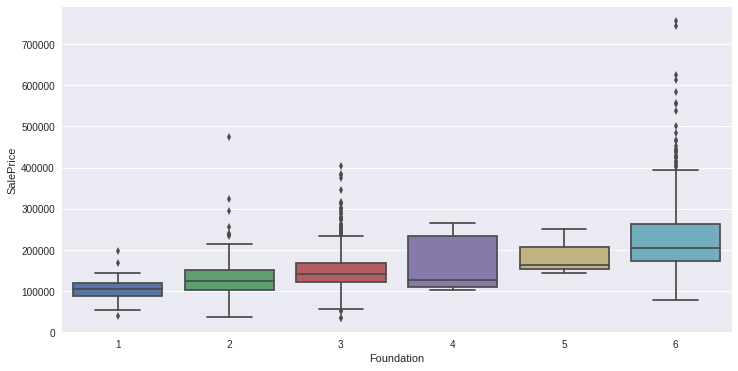

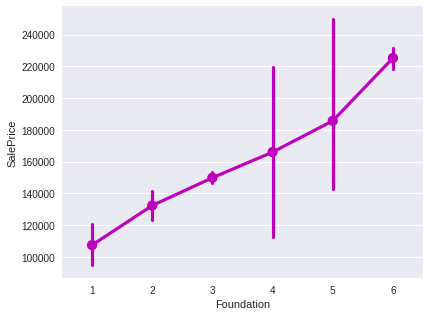

In [14]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Foundation', y = 'SalePrice',  data = df_train)
sns.factorplot('Foundation', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [12]:
mapping_Foundation = {"PConc":6, "Wood":5, "Stone":4, "CBlock":3, "BrkTil":2, "Slab":1}
for dataset in combine:
    dataset['Foundation'] = dataset['Foundation'].map(mapping_Foundation)
    dataset['Foundation'] = dataset['Foundation'].fillna(0)

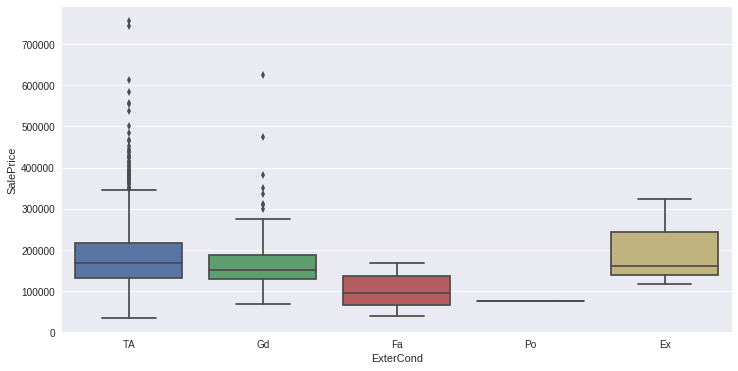

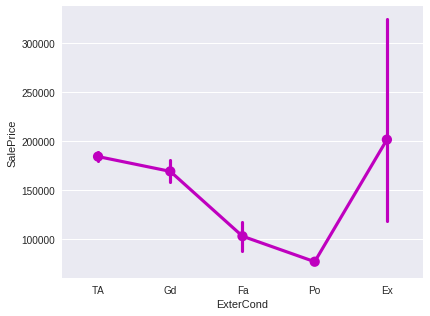

In [15]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'ExterCond', y = 'SalePrice',  data = df_train)
sns.factorplot('ExterCond', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [16]:
mapping_ExterCond = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset['ExterCond'] = dataset['ExterCond'].map(mapping_ExterCond)
    dataset['ExterCond'] = dataset['ExterCond'].fillna(0)

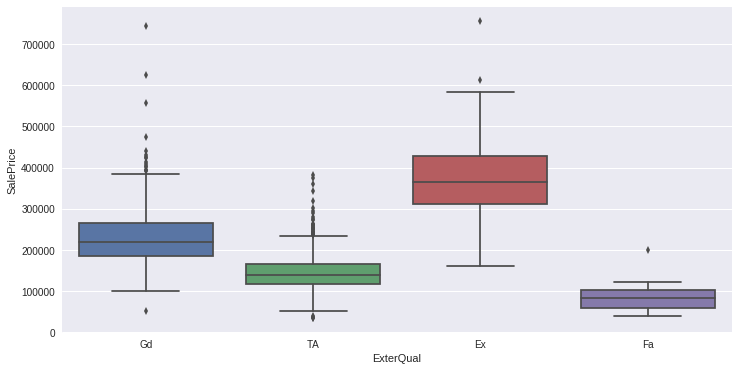

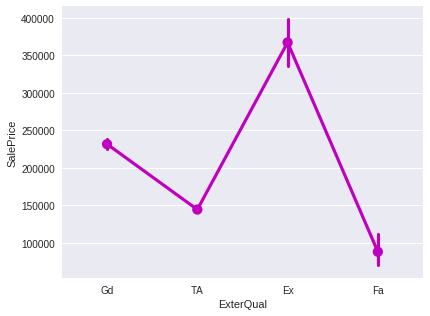

In [17]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'ExterQual', y = 'SalePrice',  data = df_train)
sns.factorplot('ExterQual', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [18]:
mapping_ExterQual = {"Ex":4, "Gd":3, "TA":2, "Fa":1}
for dataset in combine:
    dataset['ExterQual'] = dataset['ExterQual'].map(mapping_ExterQual)
    dataset['ExterQual'] = dataset['ExterQual'].fillna(0)

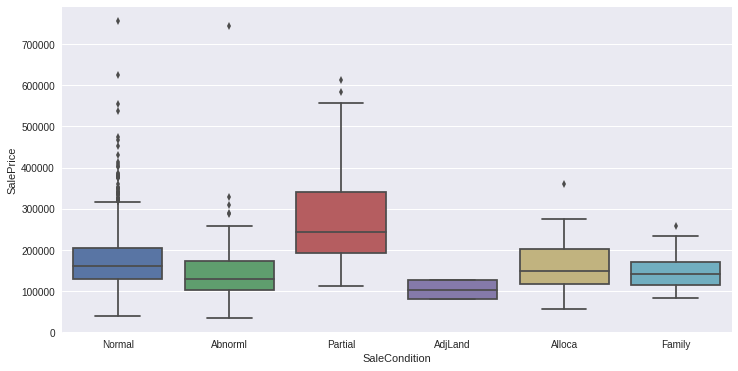

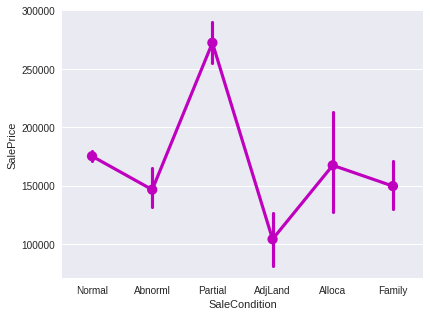

In [19]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'SaleCondition', y = 'SalePrice',  data = df_train)
sns.factorplot('SaleCondition', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [ ]:
sns.countplot('SaleCondition', data=df_train)

In [ ]:
df_train[['SaleCondition','SalePrice']].groupby(['SaleCondition']).mean().sort_values(by='SalePrice', ascending=False)

In [ ]:
df_train['SaleCondition'].unique()

In [20]:
mapping_SaleCondition = {"Partial":6, "Normal":5, "Alloca":4, "Family":3, "Abnorml":2, "AdjLand":1}
for dataset in combine:
    dataset['SaleCondition'] = dataset['SaleCondition'].map(mapping_SaleCondition)
    dataset['SaleCondition'] = dataset['SaleCondition'].fillna(0)

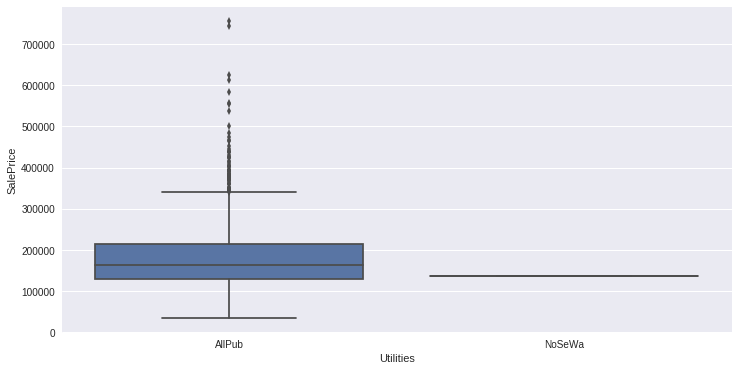

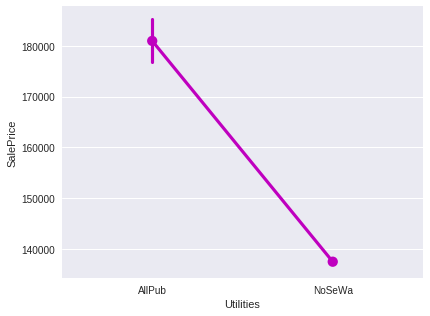

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Utilities', y = 'SalePrice',  data = df_train)
sns.factorplot('Utilities', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [ ]:
df_test['Utilities'].unique()

In [22]:
mapping_Utilities = {"AllPub":1, "NoSeWa":0}
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].map(mapping_Utilities)
    dataset['Utilities'] = dataset['Utilities'].fillna(0)

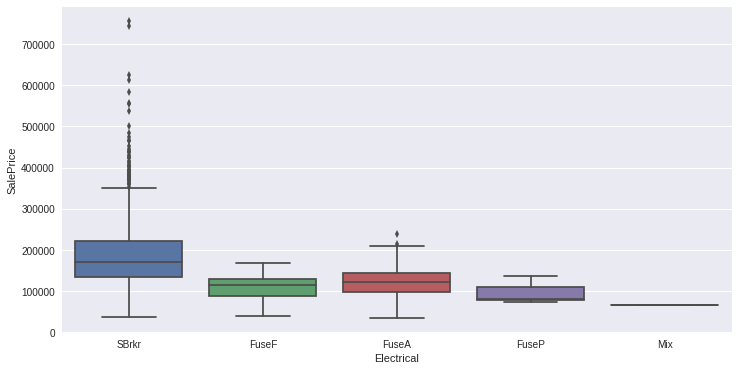

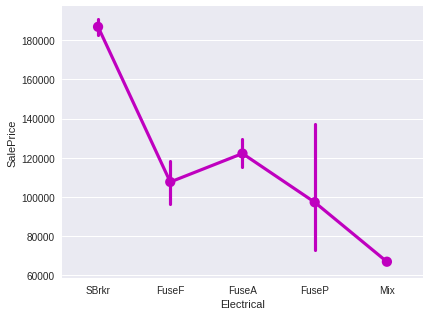

In [23]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Electrical', y = 'SalePrice',  data = df_train)
sns.factorplot('Electrical', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [24]:
df_train.loc[df_train['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [25]:
mapping_Electrical = {"SBrkr":5, "FuseA":4, "FuseF":3, "FuseP":2, "Mix":1}
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].map(mapping_Electrical)
    dataset['Electrical'] = dataset['Electrical'].fillna(0)

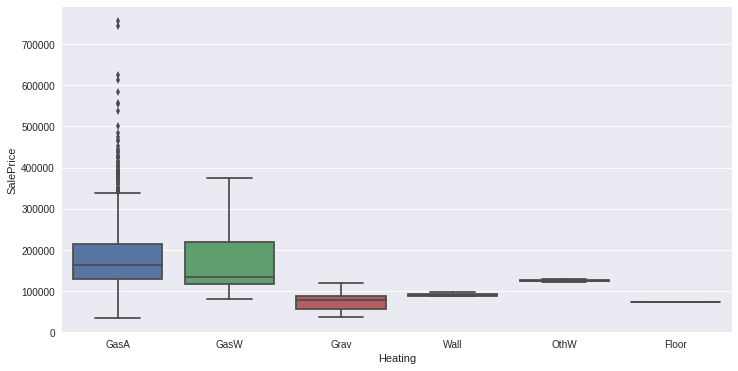

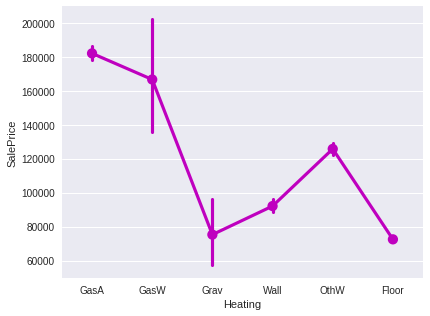

In [26]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Heating', y = 'SalePrice',  data = df_train)
sns.factorplot('Heating', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [27]:
mapping_Heating = {"GasA":6, "GasW":5, "OthW":4, "Wall":3, "Grav":2, "Floor":1}
for dataset in combine:
    dataset['Heating'] = dataset['Heating'].map(mapping_Heating)
    dataset['Heating'] = dataset['Heating'].fillna(0)

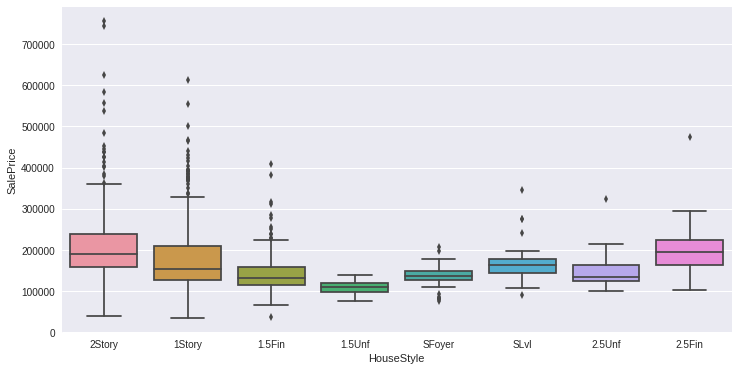

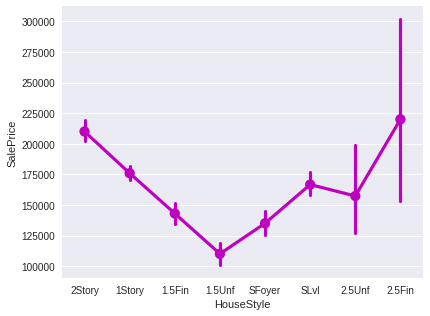

In [28]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'HouseStyle', y = 'SalePrice',  data = df_train)
sns.factorplot('HouseStyle', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [ ]:
df_train[['HouseStyle','SalePrice']].groupby(['HouseStyle'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

In [ ]:
mapping_HouseStyle = {"2.5Fin":8, "2Story":7, "1Story":6, "SLvl":5, "2.5Unf":4, "1.5Fin":3, "SFoyer":2, "1.5Unf":1}
for dataset in combine:
    dataset['HouseStyle'] = dataset['HouseStyle'].map(mapping_HouseStyle)
    dataset['HouseStyle'] = dataset['HouseStyle'].fillna(0)

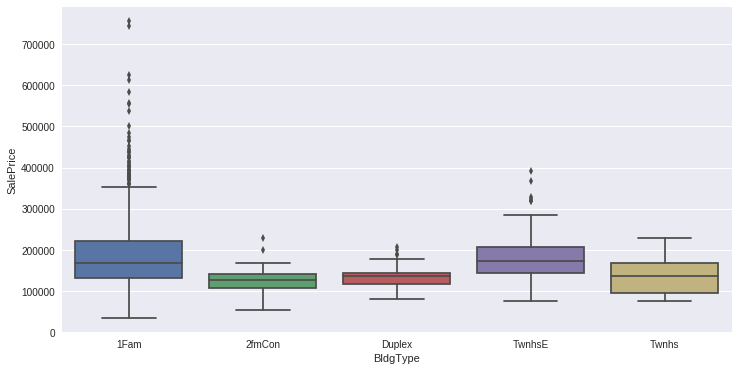

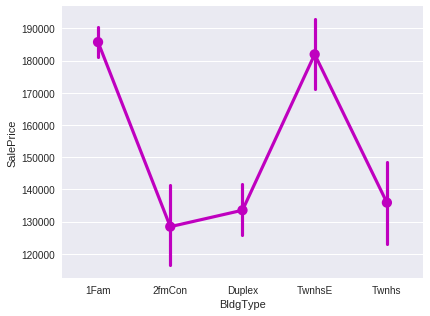

In [29]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'BldgType', y = 'SalePrice',  data = df_train)
sns.factorplot('BldgType', 'SalePrice', data = df_train, color = 'm',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [30]:
mapping_BldgType = {"1Fam":5, "TwnhsE":4, "Twnhs":3, "Duplex":2, "2fmCon":1}
for dataset in combine:
    dataset['BldgType'] = dataset['BldgType'].map(mapping_BldgType)
    dataset['BldgType'] = dataset['BldgType'].fillna(0)

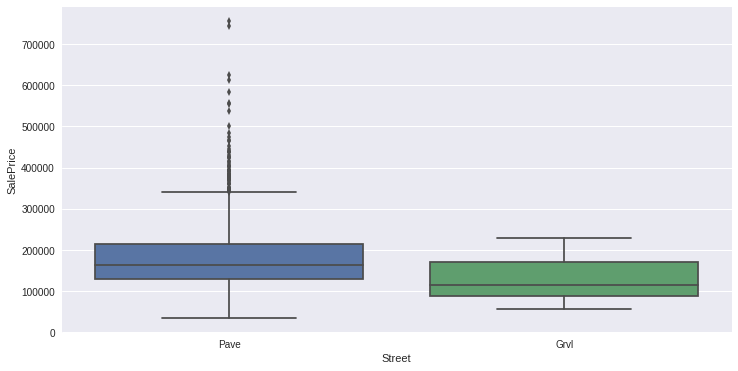

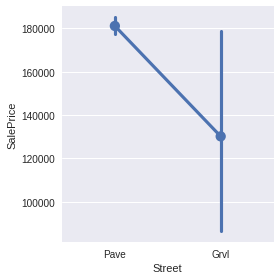

In [31]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Street', y = 'SalePrice',  data = df_train)
sns.factorplot(x='Street', y='SalePrice', data = df_train, estimator=np.mean)

In [32]:
mapping_Street = {"Pave":1, "Grvl":0}
for dataset in combine:
    dataset['Street'] = dataset['Street'].map(mapping_Street)
    dataset['Street'] = dataset['Street'].fillna(0)

In [33]:
mapping_Alley = {"Pave":2, "Grvl":1}
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].map(mapping_Alley)
    dataset['Alley'] = dataset['Alley'].fillna(0) # NA means no alley access

In [ ]:
#Most of the houses don't have pool, so this is not a key feature, can be deleted...
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'PoolQC', y = 'SalePrice',  data = df_train)
sns.countplot(x='PoolQC', data=df_train)

In [ ]:
sns.countplot(x='PoolQC', data=df_train)

In [ ]:
#only those seven house having pool have pool quality feature
var = 'PoolArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

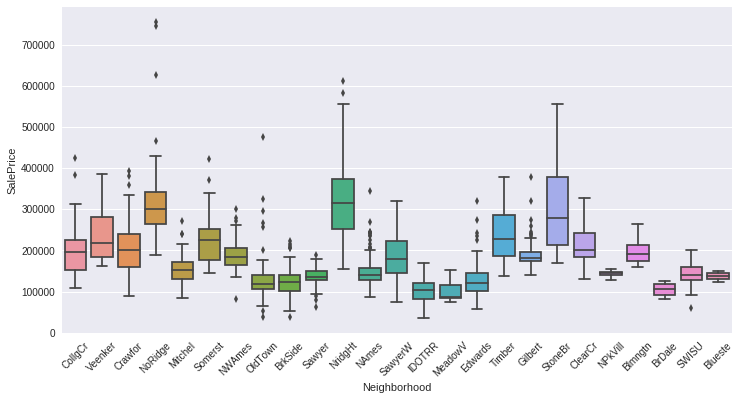

In [34]:
# Neighbourhood, Physical location within ames city limits
# just distinguish rich area and poor area should be good enough... 
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df_train)
xt = plt.xticks(rotation=45)

In [35]:
df_train[['Neighborhood','SalePrice']].groupby(['Neighborhood']).mean().sort_values(by='SalePrice', ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


In [36]:
for dataset in combine:
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['NoRidge','NridgHt','StoneBr'], 6)
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Timber','Veenker','Somerst','ClearCr','Crawfor'], 5)
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['CollgCr','Blmngtn','Gilbert','NWAmes','SawyerW'], 4)
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['Mitchel','NAmes','NPkVill','SWISU','Blueste','Sawyer'], 3)
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['OldTown','Edwards','BrkSide'], 2)
    dataset['Neighborhood'] = dataset['Neighborhood'].replace(['BrDale','IDOTRR','MeadowV'], 1)
    dataset['Neighborhood'] = dataset['Neighborhood'].fillna(0)

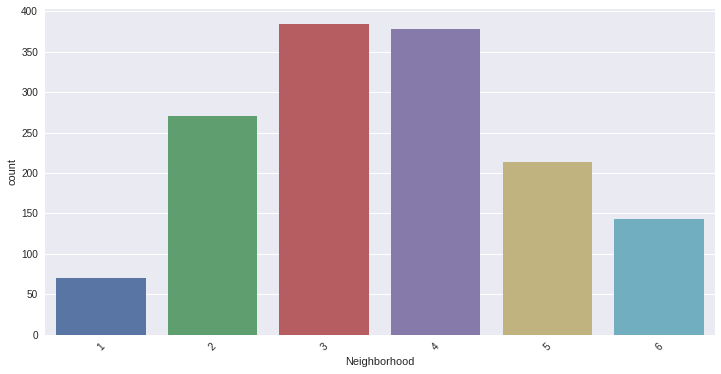

In [37]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df_train)
# xt = plt.xticks(rotation=45)

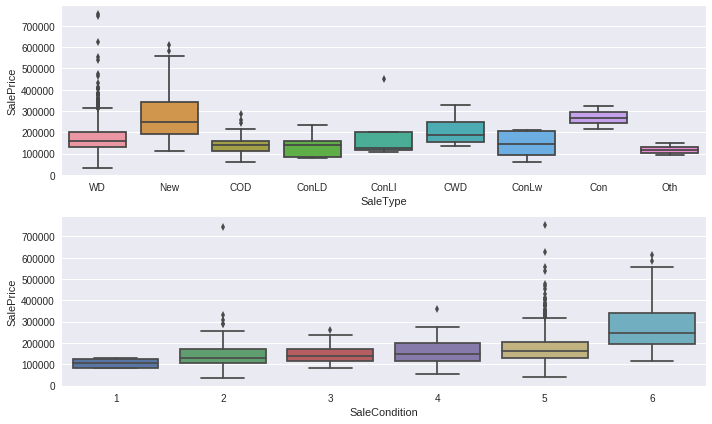

In [38]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_train, ax = ax[1])
plt.tight_layout()

In [ ]:
sns.factorplot('SaleType', 'SalePrice', data = df_train, color = 'r',
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df_train, ax = ax[0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df_train, ax = ax[1])
plt.tight_layout()

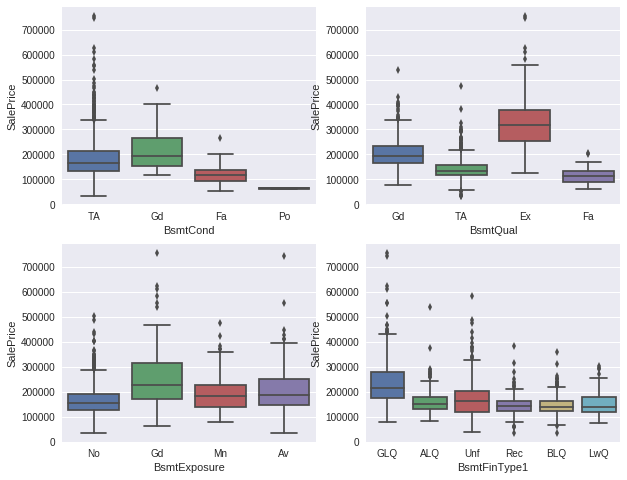

In [39]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df_train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df_train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df_train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df_train, ax = ax[1, 1])

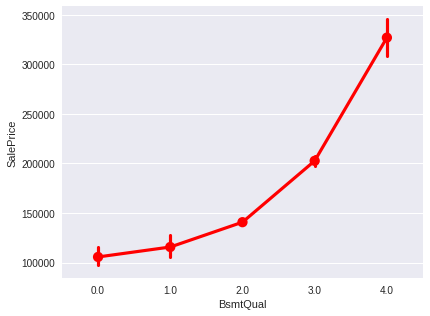

In [43]:
sns.factorplot('BsmtQual', 'SalePrice', data = df_train, color = 'r',
               estimator = np.mean,
               size = 4.5,  aspect=1.35)

In [41]:
# df_train[df_train['BsmtQual']=='TA'].describe()
mapping_BsmtQual = {"Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}

for dataset in combine:
    dataset['BsmtQual'] = dataset['BsmtQual'].map(mapping_BsmtQual)
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna(0) #No Basement

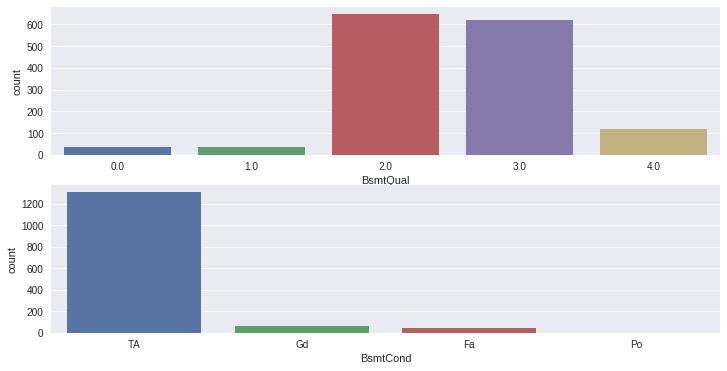

In [44]:
fig, ax = plt.subplots(2, 1, figsize = (12, 6))
sns.countplot(x = 'BsmtQual', data = df_train, ax = ax[0])
sns.countplot(x = 'BsmtCond', data = df_train, ax = ax[1])

In [ ]:
#Fill nan for BsmtQual with correlation to sale price
#loc[(df_train['BsmtQual'].isnull()) & df_train['BsmtCond'].isnull()]

In [45]:
mapping_BsmtCond = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4}

for dataset in combine:
    dataset['BsmtCond'] = dataset['BsmtCond'].map(mapping_BsmtCond)
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna(0)

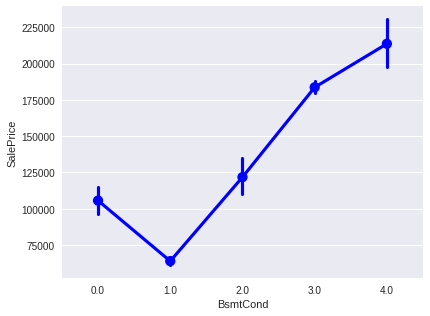

In [46]:
sns.factorplot('BsmtCond', 'SalePrice', data = df_train, color = 'b',
               estimator = np.mean, # order = ['Gd', 'TA', 'Fa','Po'], 
               size = 4.5,  aspect=1.35)

In [ ]:
df_train['BsmtCond'].isnull().sum()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df_train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df_train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot('Functional', 'SalePrice', data=df_train)

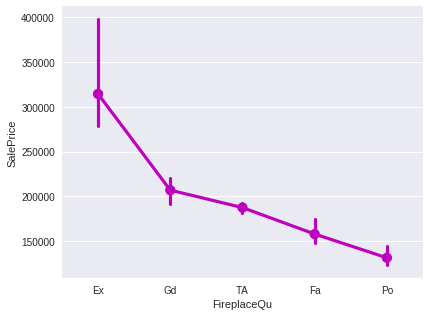

In [47]:
sns.factorplot('FireplaceQu', 'SalePrice', data = df_train, color = 'm',
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
               size = 4.5,  aspect=1.35)

In [48]:
mapping_FireplaceQu = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].map(mapping_FireplaceQu)
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(0) #No fireplace

In [ ]:
pd.crosstab(df_train.HeatingQC, df_train.CentralAir)

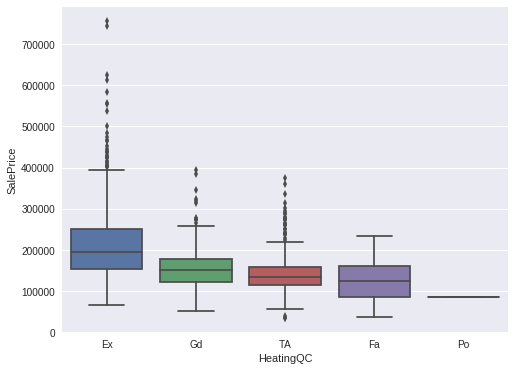

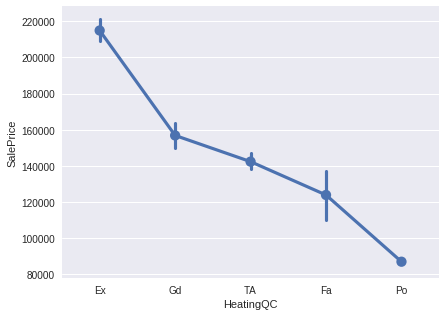

In [49]:
plt.figure(figsize = (8, 6))
sns.boxplot('HeatingQC', 'SalePrice', data=df_train)
sns.factorplot('HeatingQC', 'SalePrice', data=df_train, estimator=np.mean, size = 4.5, aspect = 1.4)

In [50]:
mapping_HeatingQC = {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1}

for dataset in combine:
    dataset['HeatingQC'] = dataset['HeatingQC'].map(mapping_HeatingQC)
    dataset['HeatingQC'] = dataset['HeatingQC'].fillna(0)

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot('CentralAir', 'SalePrice', data=df_train)

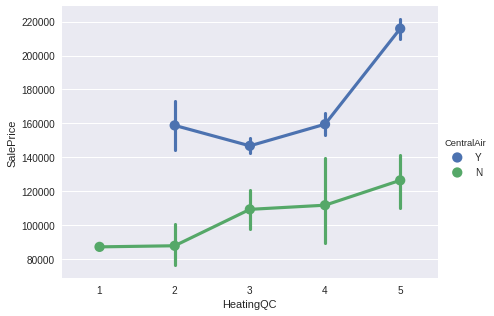

In [51]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df_train, 
               size = 4.5, aspect = 1.4)

# Having AC has a big impact on sale price

In [52]:
mapping_AC = {"Y": 1, "N": 0}

for dataset in combine:
    dataset['CentralAir'] = dataset['CentralAir'].map(mapping_AC)

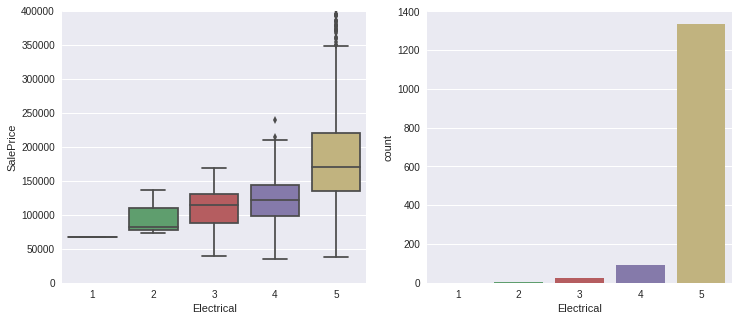

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.boxplot('Electrical', 'SalePrice', data = df_train, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = df_train)
# plt.tight_layout()

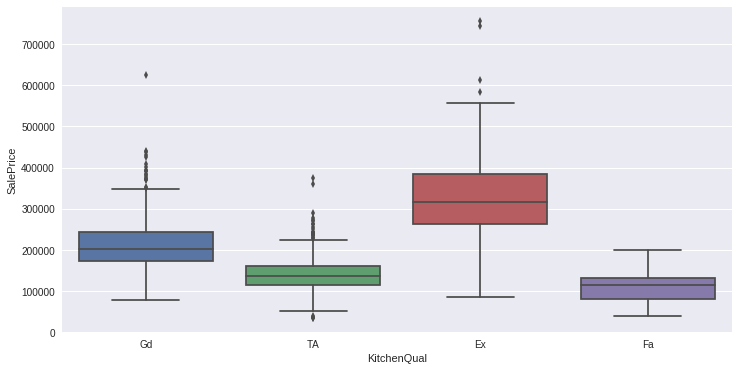

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot('KitchenQual','SalePrice', data=df_train)

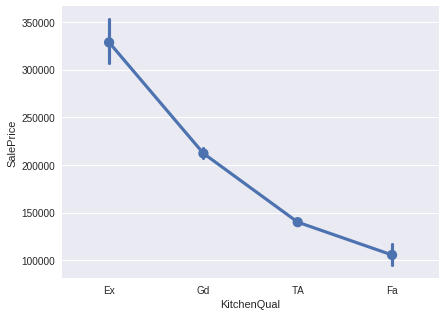

In [55]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df_train, order = ['Ex', 'Gd', 'TA', 'Fa'])

In [56]:
mapping_KitchenQual = {"Ex": 4, "Gd": 3, "TA":2, "Fa":1}

for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].map(mapping_KitchenQual)
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(0)

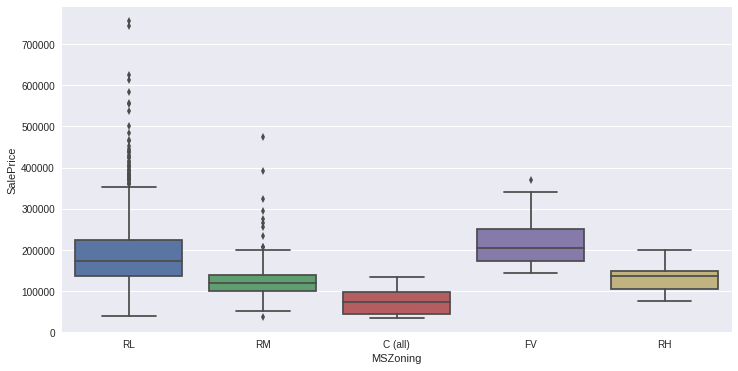

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot('MSZoning','SalePrice', data=df_train)

In [ ]:
df_train['MSZoning'].unique()

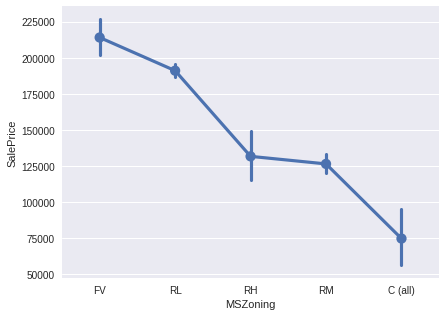

In [58]:
sns.factorplot('MSZoning', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df_train, order = ['FV', 'RL', 'RH', 'RM','C (all)'])

In [59]:
mapping_MSZoning = {"FV":5, "RL":4, "RH":3, "RM":2, "C (all)":1}

for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].map(mapping_MSZoning)
    dataset['MSZoning'] = dataset['MSZoning'].fillna(0)

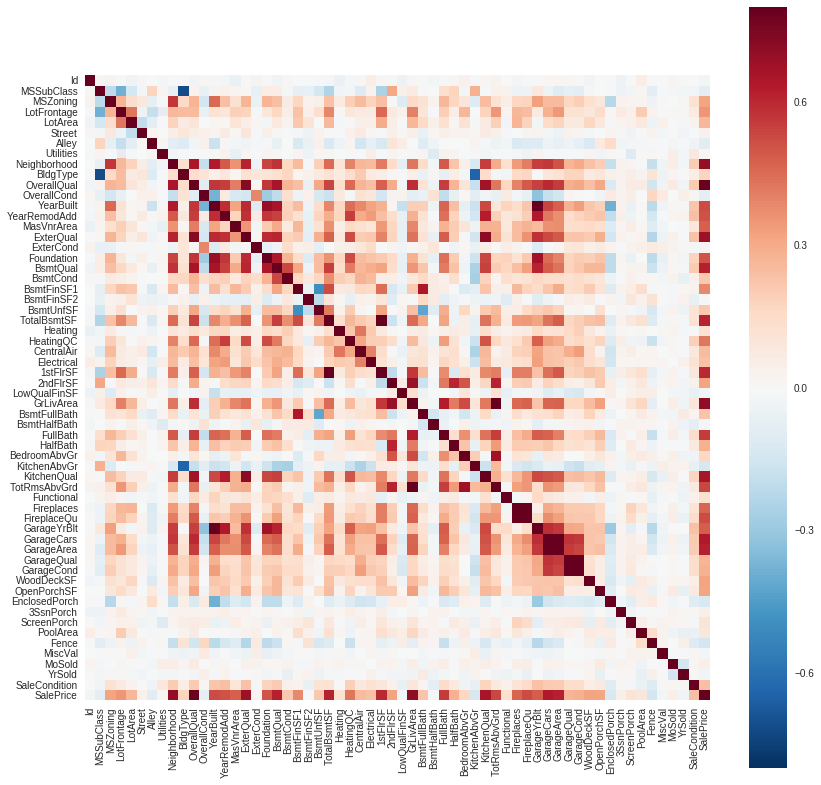

In [60]:
#correlation matrix, a more object analysis of the data set wrt sale price
corrmat = df_train.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corrmat, vmax=0.8, square=True)

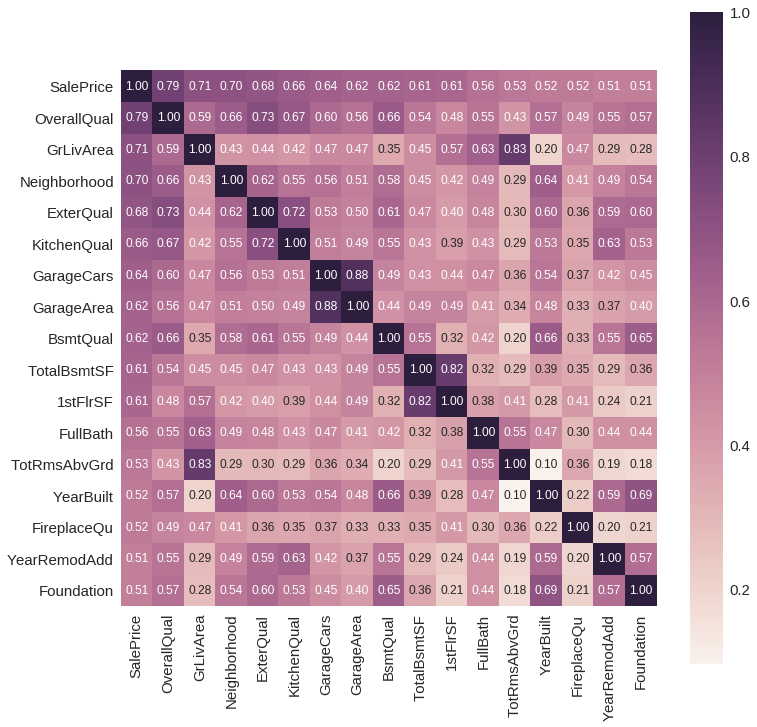

In [65]:
k = 17 #number of variables for the heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.subplots(figsize=(12,12))
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)

Dealing with numerical data

In [67]:
#finding out the features with missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11) #11 features with missing data, some of them are categorical features and can be deleted

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
MasVnrArea,8,0.005479


In [68]:
#dealing with features with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)

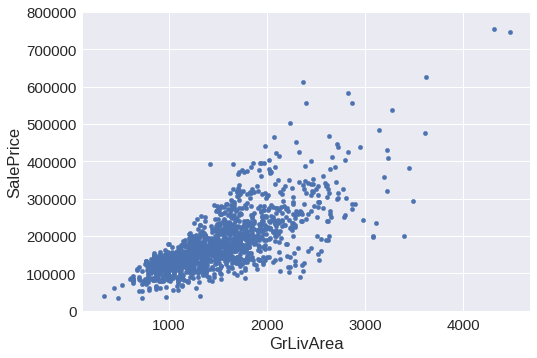

In [74]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [75]:
#Deleting Outliers: the two largest GrLivArea with low sale price can be considered as outliers

df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
#df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
#df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
1182,1183,60,4,15623,1,0.0,IR1,Lvl,1,Corner,...,0,555,3.0,0,7,2007,WD,2,745000,1
691,692,60,4,21535,1,0.0,IR1,Lvl,1,Corner,...,0,0,0.0,0,1,2007,WD,5,755000,1


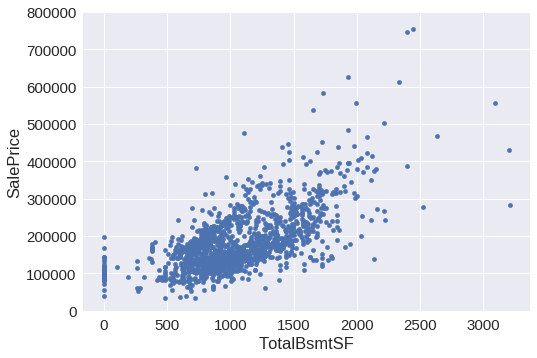

In [71]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [72]:
#Create a new feature to represent houses with or without basement (TotalBsmtSF == 0)
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

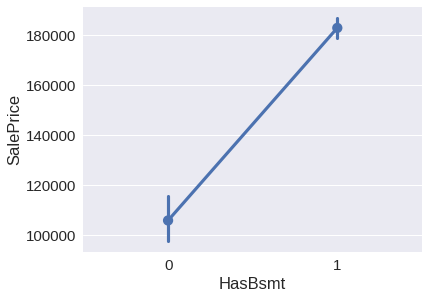

In [73]:
sns.factorplot('HasBsmt', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df_train)

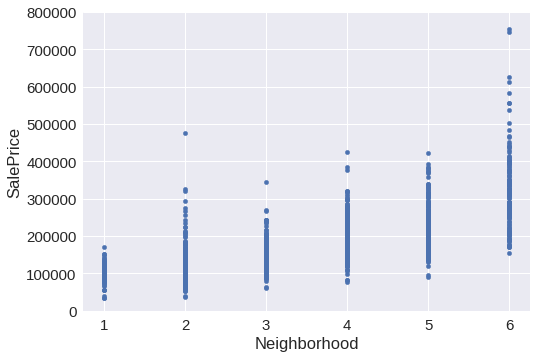

In [77]:
#bivariate analysis saleprice/grlivarea
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [81]:
df_train.loc[(df_train['Neighborhood']==2)&(df_train['SalePrice']>400000),'Id']
df_train = df_train.drop(df_train[df_train['Id']==186].index)

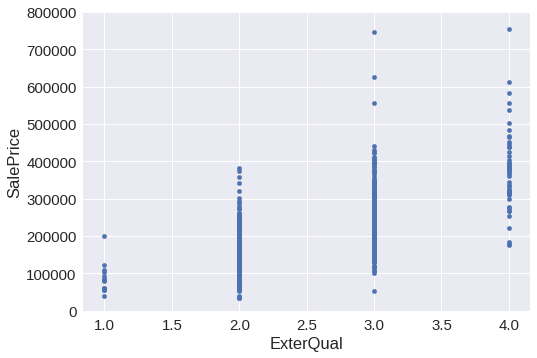

In [82]:
var = 'ExterQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [84]:
df_train.loc[(df_train['ExterQual']==3)&(df_train['SalePrice']>500000),'Id']
df_train = df_train.drop(df_train[df_train['Id']==1047].index)
df_train = df_train.drop(df_train[df_train['Id']==1170].index)
df_train = df_train.drop(df_train[df_train['Id']==1183].index)

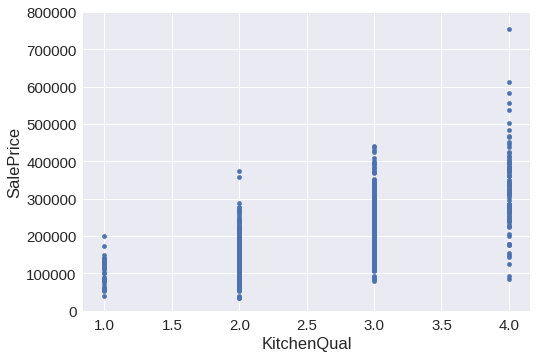

In [86]:
#bivariate analysis saleprice/grlivarea
var = 'KitchenQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

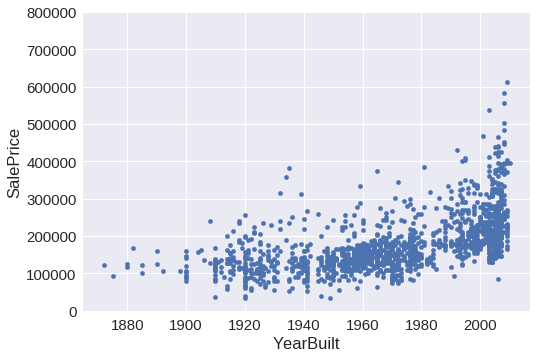

In [91]:
#year built with SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [90]:
# X_train.loc[(X_train['YearBuilt']<1900)&(X_train['SalePrice']>200000),'Id']
# X_train.loc[(X_train['YearBuilt']<2000)&(X_train['YearBuilt']>1980)&(X_train['SalePrice']>600000),'Id']

idx = [305, 584, 748, 692]

for i in idx:
    df_train = df_train.drop(df_train[df_train['Id']==i].index)

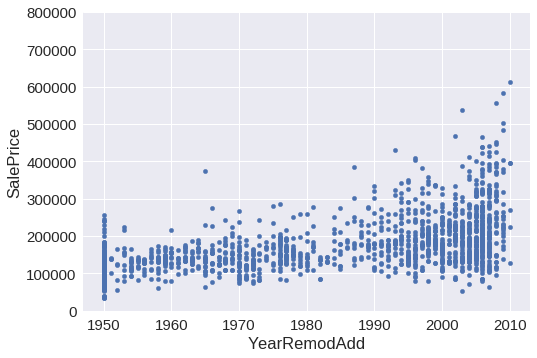

In [93]:
#year remod with SalePrice
var = 'YearRemodAdd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [94]:
for dataset in combine:
    dataset.loc[(dataset['YearBuilt'] <= 1900), 'HouseAge'] = 7 # Oldest
    dataset.loc[(dataset['YearBuilt'] > 1900) & (dataset['YearBuilt'] <= 1920), 'HouseAge'] = 6
    dataset.loc[(dataset['YearBuilt'] > 1920) & (dataset['YearBuilt'] <= 1940), 'HouseAge'] = 5
    dataset.loc[(dataset['YearBuilt'] > 1940) & (dataset['YearBuilt'] <= 1960), 'HouseAge'] = 4
    dataset.loc[(dataset['YearBuilt'] > 1960) & (dataset['YearBuilt'] <= 1980), 'HouseAge'] = 3
    dataset.loc[(dataset['YearBuilt'] > 1980) & (dataset['YearBuilt'] <= 2000), 'HouseAge'] = 2
    dataset.loc[(dataset['YearBuilt'] > 2000), 'HouseAge'] = 1

In [95]:
for dataset in combine:
    dataset.loc[(dataset['YearRemodAdd']<=1980),'RemodAge'] = 4
    dataset.loc[(dataset['YearRemodAdd']>1980)&(dataset['YearRemodAdd']<=1990),'RemodAge'] = 3
    dataset.loc[(dataset['YearRemodAdd']>1990)&(dataset['YearRemodAdd']<=2000),'RemodAge'] = 2
    dataset.loc[(dataset['YearRemodAdd']>2000),'RemodAge'] = 1

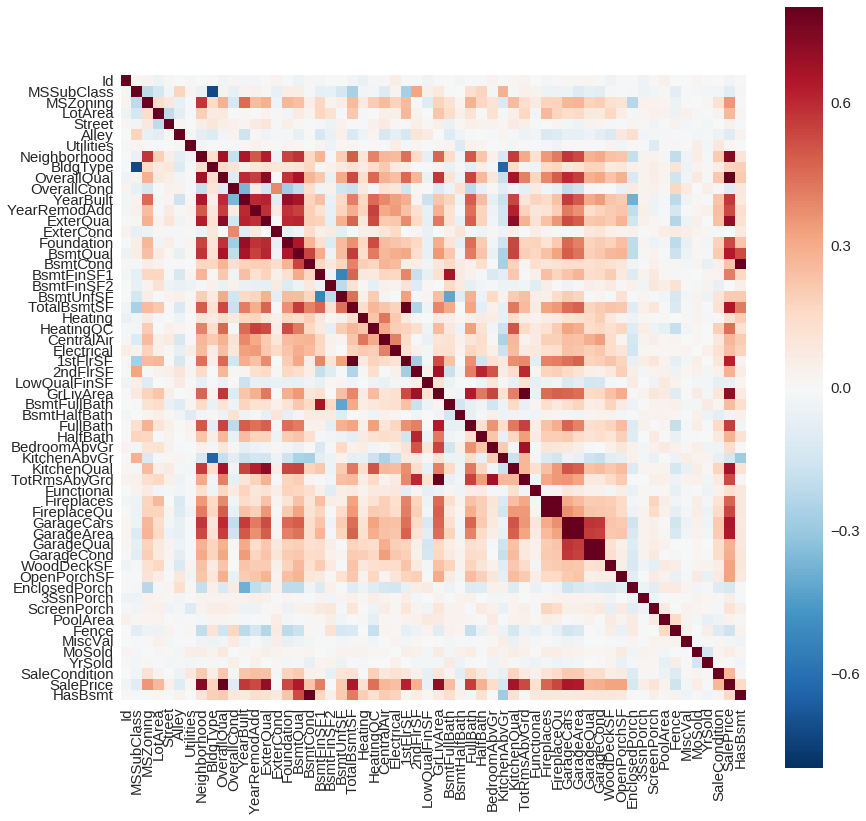

In [96]:
#correlation matrix, a more object analysis of the data set wrt sale price
corrmat = df_train.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corrmat, vmax=0.8, square=True)

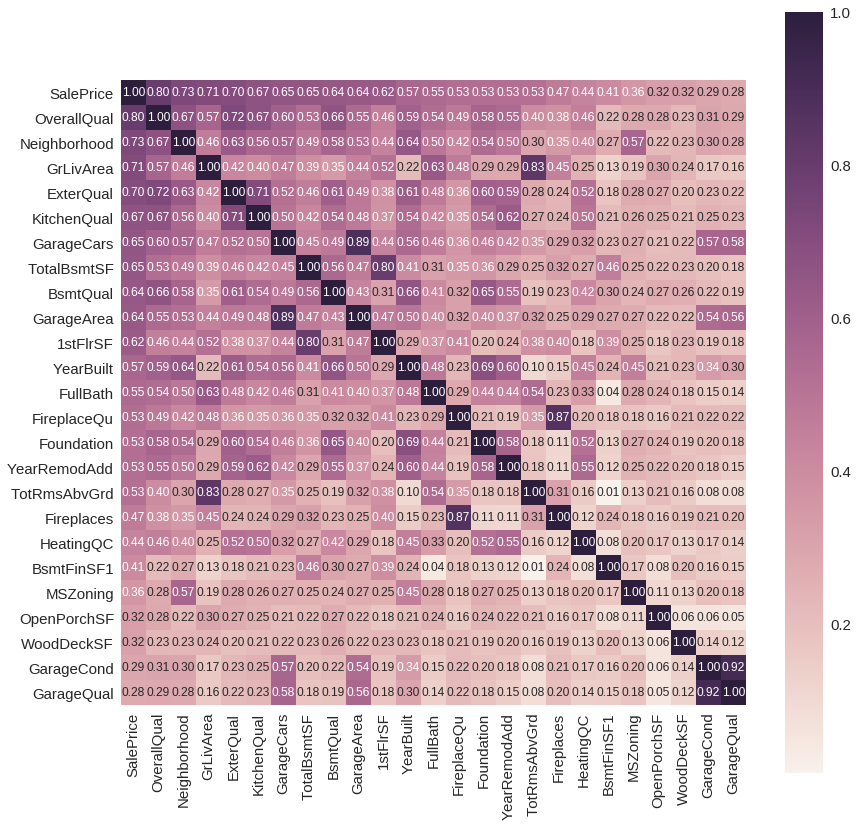

In [160]:
k = 25 #number of variables for the heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.subplots(figsize=(14,14))
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values, xticklabels=cols.values)

In [142]:
#Select most correlated features as training data and test data
#might be overfitting....
X_train = df_train[['OverallQual','Neighborhood','GrLivArea','ExterQual','KitchenQual','GarageCars',
                    'TotalBsmtSF','BsmtQual','YearBuilt','FullBath','FireplaceQu',#'Foundation',
                    'YearRemodAdd','TotRmsAbvGrd']] #,'HeatingQC','BsmtFinSF1','MSZoning']]
Y_train = df_train['SalePrice']
X_test = df_test[['OverallQual','Neighborhood','GrLivArea','ExterQual','KitchenQual','GarageCars',
                    'TotalBsmtSF','BsmtQual','YearBuilt','FullBath','FireplaceQu',#'Foundation',
                    'YearRemodAdd','TotRmsAbvGrd']] #,'HeatingQC','BsmtFinSF1','MSZoning']]

In [143]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head()
#training data has no missing data

In [144]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
YearRemodAdd,0,0.000000
Foundation,0,0.000000


In [145]:
X_test.loc[X_test['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = X_test['TotalBsmtSF'].median()
X_test.loc[X_test['GarageCars'].isnull(), 'GarageCars'] = X_test['GarageCars'].median()
#X_test.loc[X_test['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = X_test['BsmtFinSF1'].median()

Training Process: start with linear regression

In [146]:
#Linear Regression

from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [147]:
lasso = LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], cv=5)  # L1 regularization, alpha is the rate
lasso.fit(X_train, Y_train)
acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)
print acc_lasso
print lasso.alpha_

84.71
100.0


In [108]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 17 variables and eliminated the other 0 variables


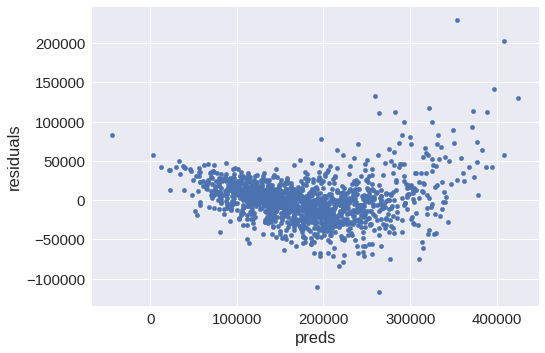

In [109]:
#let's look at the residuals as well:
plt.figure(figsize=(10, 10))
preds = pd.DataFrame({"preds":lasso.predict(X_train), "true":Y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

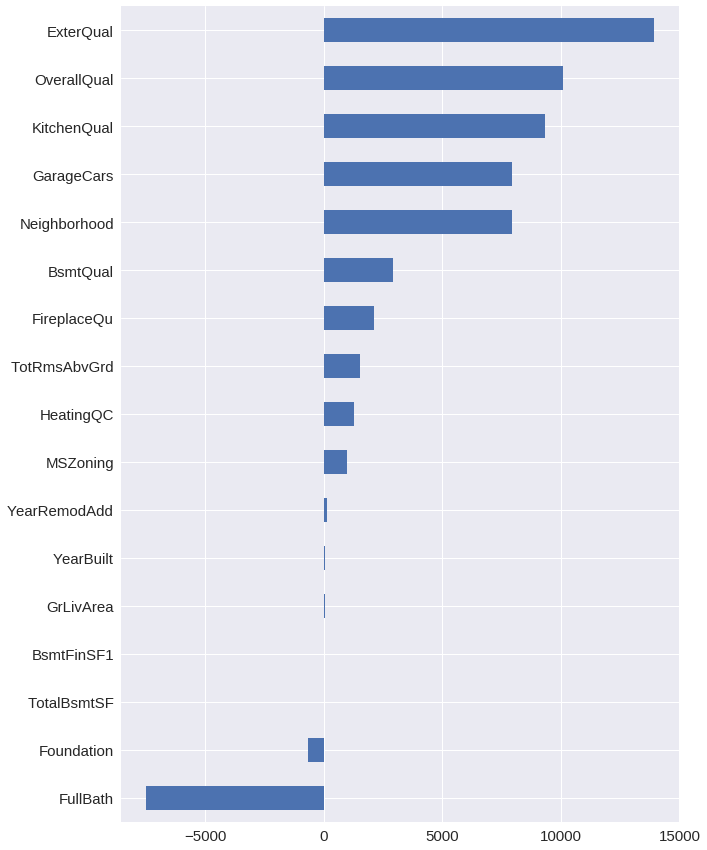

In [110]:
plt.subplots(figsize=(10,15))
coef.sort_values().plot(kind='barh')

In [111]:
ridge = RidgeCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], cv=5)  # L1 regularization, alpha is the rate
ridge.fit(X_train, Y_train)
acc_ridge = round(ridge.score(X_train, Y_train) * 100, 2)
acc_ridge

86.34

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
import xgboost as xgb

In [151]:
#bagging

bagging = BaggingRegressor(n_estimators = 10)
bagging.fit(X_train, Y_train)
acc_bagging = round(bagging.score(X_train, Y_train) * 100, 2)
acc_bagging

97.62

In [152]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
acc_dt = round(dt.score(X_train, Y_train) * 100, 2)
acc_dt

99.99

In [153]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 40)
rf.fit(X_train, Y_train)
acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
acc_rf

98.18

In [154]:
#Gradient Boost
gb = GradientBoostingRegressor(n_estimators=300)
gb.fit(X_train, Y_train)
acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
acc_gb

96.4

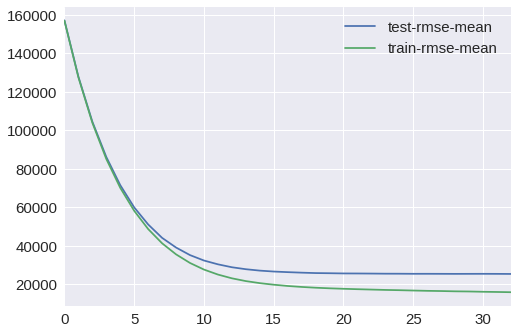

In [155]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":4, "eta":0.2}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)


model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [156]:
model_xgb = xgb.XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.2) #the params were tuned using xgb.cv
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [157]:
xgb_preds = model_xgb.predict(X_test)
#ridge_preds = ridge.predict(X_test)
#lasso_preds = lasso.predict(X_test)
bagging_preds = bagging.predict(X_test)
gb_preds = gb.predict(X_test)
rf_preds = rf.predict(X_test)
dt_preds = dt.predict(X_test)

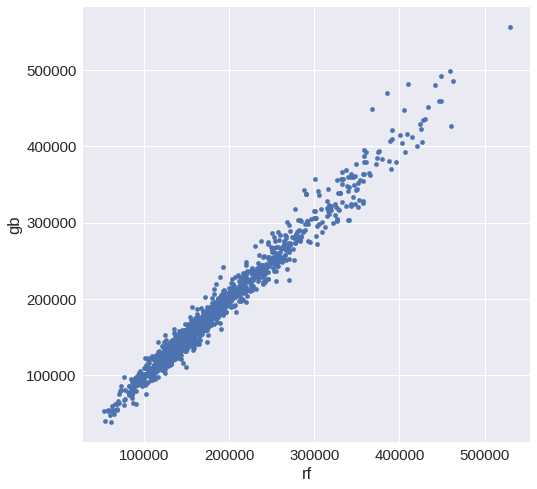

In [158]:
predictions = pd.DataFrame({"rf":rf_preds, "gb":gb_preds})
# plt.subplots(figsize=(8,8))
predictions.plot(x = "rf", y = "gb", kind = "scatter", figsize=(8,8))

In [159]:
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":gb_preds})
solution.to_csv("categorical_feature_prediction/gb_sol.csv", index = False)